In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)


4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [6]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5191 - accuracy: 0.8077 - val_loss: 0.3835 - val_accuracy: 0.8567
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3600 - accuracy: 0.8652 - val_loss: 0.3675 - val_accuracy: 0.8598
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3127 - accuracy: 0.8823 - val_loss: 0.3323 - val_accuracy: 0.8732
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2785 - accuracy: 0.8947 - val_loss: 0.3091 - val_accuracy: 0.8865
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2575 - accuracy: 0.9026 - val_loss: 0.2991 - val_accuracy: 0.8948
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2340 - accuracy: 0.9107 - val_loss: 0.3096 - val_accuracy: 0.8853
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2163 - accuracy: 0.9173 - val_loss: 0.2950 -

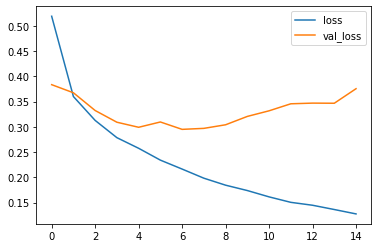

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

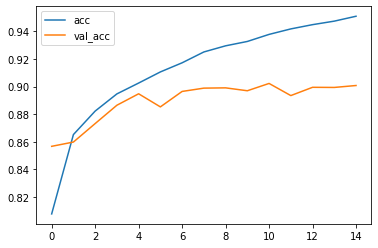

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[841   3  18  30   2   2 100   0   4   0]
 [  5 974   1  13   2   0   4   0   1   0]
 [ 11   0 871  17  33   0  68   0   0   0]
 [  7   3  12 941  19   0  16   0   2   0]
 [  0   3  84  37 791   0  80   0   5   0]
 [  0   0   0   1   0 968   0  22   2   7]
 [ 93   2  62  37  76   0 716   0  14   0]
 [  0   0   0   0   0   7   0 984   0   9]
 [  1   1   6   2   1   2   6   2 977   2]
 [  1   0   0   0   0   8   0  46   0 945]]


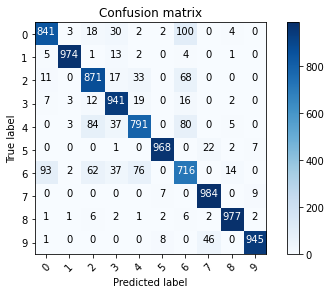

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

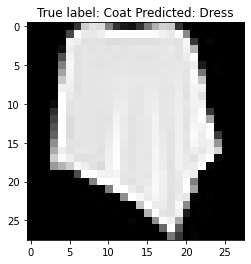

In [14]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));